<a href="https://colab.research.google.com/github/ucfilho/vichebling2810/blob/main/volume_laranjas/ANN_laranjas_v2_dez_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random
from skimage import feature
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [2]:

#link: https://drive.google.com/file/d/1tqFHN01uA3_MlLcmJvAC-2tnd8p8byDW/view?usp=sharing
!gdown --id 1tqFHN01uA3_MlLcmJvAC-2tnd8p8byDW


Downloading...
From: https://drive.google.com/uc?id=1tqFHN01uA3_MlLcmJvAC-2tnd8p8byDW
To: /content/laranjas2.zip
100% 1.10G/1.10G [00:06<00:00, 175MB/s]


In [3]:
import zipfile
file_name = zipfile.ZipFile('laranjas2.zip', 'r')
file_name.extractall()

In [4]:
FILE='laranjas2.zip'
img_name=[]
x_original = [] 

ref ='png'
data_file ='xlsx'

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:]==ref):
        img_name.append(name)
        #x_original.append(cv2.resize(cv2.imread(name),(60,80)))
        x_original.append(cv2.resize(cv2.imread(name,0),(60,80)))
      else:
        if(name[-4:] == data_file):
          df =pd.read_excel(name)


In [5]:
name_down=[]  # down representa as frutas deitadas
original_down = [] 
name_up=[] # down representa as frutas em pe
original_up= [] 

In [6]:
k = 0
for name in img_name:
  if(name[-5]=='a'):
    name_up.append(name)
    original_up.append(x_original[k])
  else:
    name_down.append(name)
    original_down.append(x_original[k])
  k = k +1


In [7]:
def get_dimension(img):
  im = img
  # Compute the Canny filter for two values of sigma
  edges1 = feature.canny(im)
  edges2 = feature.canny(im, sigma=3)
  nrows,ncols =edges2.shape
  Foto = np.ones((nrows,ncols))*255
  for i in range(nrows):
    for j in range(ncols):
      if edges2[i,j] == True:
        Foto[i,j]=0
  Foto = Foto.astype(int)
# calculo do raio horizontal
  Quadrado = []
  Raio = []
  for i in range(nrows):
    values = np.zeros(4)
    k = -1
    for j in range(1,ncols):
      if(Foto[i,j-1]==255 and Foto[i,j]==0):
        if(k<3):
          k = k+1
          values[k]=j
    L = values[3] - values[0]
    d = values[2] - values[1]
    Quadrado.append(L/2)
    Raio.append(d/2)
  L = np.array(Quadrado).max()
  Raio = np.array(Raio).max()
  medida = Raio/L*14.5
  return medida,Foto


In [8]:
def area_fruta(img):
  (rows, cols) =img.shape

  img_fruit = np.zeros(img.shape,np.uint8) 

  for i in range(rows):
    for j in range(cols):
      if(img[i,j]>100):
        img[i,j]=0


  for i in range(rows):
    for j in range(cols):
      if(img[i,j]>0):
        img[i,j]=255
        img_fruit[i,j]=255

  xi=0;xf=0;yi=0;yf=0;
  jref=int(cols/2)
  iref=int(rows/2)

  for i in range(rows):
    j = jref
    if(img[i,j]>0):
      if(xi==0):
        xi = i
      else:
        xf = i
  for j in range(cols):
    i = iref
    if(img[i,j]>0):
      if(yi==0):
        yi = j
      else:
        yf = j

  for i in range(rows):
    for j in range(cols):
      if(i > xi and i < xf and j>yi and j < yf):
        img[i,j]=255

    area = 1-np.sum(img_fruit.ravel())/np.sum(img.ravel())

  return area

In [9]:
np.array(original_down).shape

(100, 80, 60)

In [10]:
(num,l,w)=np.array(original_down).shape

In [11]:
dimensao =[]
for i in range(num):
  lista =[]
  Ind = i
  img= original_up[Ind]
  medida1,foto = get_dimension(img)
  lista.append(medida1)
  img = img.transpose()
  medida2,foto = get_dimension(img)
  lista.append(medida2)
  img2= original_down[Ind]
  medida3,foto = get_dimension(img2)
  lista.append(medida3)
  img2 = img2.transpose()
  medida4,foto = get_dimension(img2)
  lista.append(medida4)
  dimensao.append(lista)


In [12]:
area_up =[]
area_down =[]
for i in range(num):
  lista =[]
  Ind = i
  img= original_up[Ind]
  area = area_fruta(img)
  area_up.append(area)
  img= original_down[Ind]
  area = area_fruta(img)
  area_down.append(area)

In [13]:
print(area_up)

[0.18342749529190205, 0.18333333333333335, 0.1645427286356822, 0.19939462731744229, 0.14736042537030003, 0.1845979614949037, 0.16314996232102486, 0.18460955269143287, 0.18962906888720665, 0.18597560975609762, 0.18704484476811034, 0.17095310136157338, 0.1796610169491526, 0.15149166989538942, 0.17938066465256797, 0.17309896828429494, 0.20190839694656493, 0.16085489313835766, 0.1797795515013303, 0.19380430676237248, 0.19506726457399104, 0.21926536731634183, 0.19528875379939215, 0.19153758972421608, 0.21595184349134688, 0.17524602573807724, 0.18209067066316975, 0.2058047493403694, 0.1532288880397401, 0.17820658342792284, 0.1573506891271057, 0.17890772128060262, 0.21020793950850658, 0.18577374195989405, 0.17850432168357755, 0.16196918451709885, 0.16405082212257105, 0.1927574500188608, 0.15542857142857147, 0.15462373642830396, 0.19045771916214116, 0.18783679753656657, 0.1822306238185255, 0.1664787673806839, 0.1656580937972768, 0.14704747201852564, 0.1823015571591341, 0.18311981914091935, 0.1

In [14]:
print(area_down)

[0.19419306184012064, 0.20463173880030372, 0.17516879219804948, 0.21928817451205507, 0.15305734903152302, 0.1969924812030075, 0.1879271070615034, 0.21044663133989405, 0.20204313280363229, 0.20839636913767023, 0.21054672353625437, 0.18367346938775508, 0.21030372933487118, 0.20847457627118648, 0.19871794871794868, 0.19358490566037734, 0.215228043724086, 0.17334331710969675, 0.1894054878048781, 0.20620506999621646, 0.2092675635276532, 0.23358490566037737, 0.218595825426945, 0.2108046845485455, 0.2269823374671176, 0.18631897203325776, 0.20090463626083677, 0.23024574669187148, 0.16488140780413163, 0.18205904617713853, 0.1732616212063004, 0.1902604756511891, 0.22332317073170727, 0.19885057471264367, 0.1840796019900498, 0.18707738542449281, 0.18164794007490637, 0.20581570996978849, 0.16660355925785686, 0.17199849454271732, 0.20219198790627357, 0.1973634651600753, 0.18583739228175344, 0.18071833648393199, 0.18216463414634143, 0.15674453654860587, 0.1923509561304837, 0.200376647834275, 0.171222

In [15]:
def elipsoide(valores):
  dif = np.zeros(4)
  k = 0
  ref =1E99
  for i in range(2):
    for j in range(2):
      dif[k] = abs(valores[i]-valores[j+2])
      if(ref > dif[k]):
        ref = dif[k]
        ind1=i # 0,1
        ind2=j+2 # 2,3
      k = k+1
  b = (valores[ind1]+valores[ind2])/2
  if(ind1 ==0):
    a = valores[1]
  else:
    a = valores[0]
  if(ind2 ==2):
    c = valores[3]
  else:
    c = valores[2]
  Vol = 4/3*np.pi*a*b*c

  return Vol  
  

  

In [16]:
Volume = []
X =[]
for i in range(num):
  valores = dimensao[i]
  X.append(valores)
  Vol = elipsoide(valores)
  Volume.append(Vol)

In [17]:
Volume

[2746.4036773949088,
 2371.284890318068,
 2716.1802700079024,
 3618.520885986265,
 2913.4676428754447,
 2376.0376165492985,
 2643.4135394925997,
 2512.9422692441203,
 2339.3655066204697,
 2052.501524076554,
 2057.777062978312,
 2552.00696243094,
 2755.806242116771,
 1880.4960785964636,
 3073.2643141253207,
 2285.754583110683,
 2345.089227426178,
 2769.438706674723,
 2590.3227790484843,
 2273.577546310571,
 2449.4215337083565,
 2391.7270014414994,
 2648.228733041264,
 3230.6206762423926,
 2093.114932030756,
 3567.6373984029456,
 2765.097210742187,
 2274.373558892137,
 2954.4658616465267,
 2855.1616853809433,
 2477.3763120502185,
 2495.873574317256,
 3059.605361618097,
 3006.417274666006,
 2043.4551171093071,
 2705.8927151948405,
 2596.533812885691,
 2730.1083489090324,
 2943.2415931430955,
 7348.802668132843,
 2286.457991506258,
 2706.626366569561,
 2383.4058597371377,
 2510.081583279213,
 2562.777330517338,
 2281.339601374968,
 2439.1681272562555,
 2497.2624240971504,
 2226.47704504225

In [18]:
df

,Volume
0,42.0
1,42.0
2,24.0
3,30.0
4,30.0
...,...
95,42.0
96,26.0
97,50.0
98,50.0


In [19]:
y = df.iloc[0:,[0]].copy()

In [20]:
area_up

[0.18342749529190205,
 0.18333333333333335,
 0.1645427286356822,
 0.19939462731744229,
 0.14736042537030003,
 0.1845979614949037,
 0.16314996232102486,
 0.18460955269143287,
 0.18962906888720665,
 0.18597560975609762,
 0.18704484476811034,
 0.17095310136157338,
 0.1796610169491526,
 0.15149166989538942,
 0.17938066465256797,
 0.17309896828429494,
 0.20190839694656493,
 0.16085489313835766,
 0.1797795515013303,
 0.19380430676237248,
 0.19506726457399104,
 0.21926536731634183,
 0.19528875379939215,
 0.19153758972421608,
 0.21595184349134688,
 0.17524602573807724,
 0.18209067066316975,
 0.2058047493403694,
 0.1532288880397401,
 0.17820658342792284,
 0.1573506891271057,
 0.17890772128060262,
 0.21020793950850658,
 0.18577374195989405,
 0.17850432168357755,
 0.16196918451709885,
 0.16405082212257105,
 0.1927574500188608,
 0.15542857142857147,
 0.15462373642830396,
 0.19045771916214116,
 0.18783679753656657,
 0.1822306238185255,
 0.1664787673806839,
 0.1656580937972768,
 0.14704747201852564,

In [21]:
#y = df['Volume'].values
#print(y)

In [22]:
X = np.array(X)
#X =np.concatenate((X,np.array(Volume).reshape(num,1)),axis=1)
X =np.concatenate((X,np.array(area_up).reshape(num,1)),axis=1)
X =np.concatenate((X,np.array(area_down).reshape(num,1)),axis=1)
X =np.concatenate((X,np.array(Volume).reshape(num,1)),axis=1)
y = np.array(y)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, shuffle=True, random_state=3)# 1

In [23]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [24]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [25]:
#y_test.shape

In [26]:
# X

In [27]:
# define a rede neural 
#Neurons = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
Neurons = [1,2,3,4,5]
vetor_r2_treino =[]
vetor_r2_teste =[]
vetor_neuron =[]
for N_Hidden in Neurons:
  #model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), max_iter=1500,random_state=11 )
  '''
  model = MLPRegressor(solver='adam',activation='tanh',alpha=1e-5,
                       hidden_layer_sizes=(N_Hidden), max_iter=1500,random_state=11 ) 
  '''
  model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,
                       hidden_layer_sizes=(N_Hidden), max_iter=3000,random_state=11 )
  model.fit(X_train, y_train)
  y_calc_train=model.predict(X_train)
  y_calc_test=model.predict(X_test)
  mse_test=mean_squared_error(y_test,y_calc_test)
  R2_test=r2_score(y_test,y_calc_test)
  mse_train=mean_squared_error(y_train,y_calc_train)
  R2_train=r2_score(y_train,y_calc_train)
  vetor_r2_teste.append(R2_test)
  vetor_r2_treino.append(R2_train)
  vetor_neuron.append(N_Hidden)
  print("Neurons",N_Hidden,"MSE treino=",mse_train,"MSE teste=",mse_test)
  print("Neurons",N_Hidden,"R^2 treino=",R2_train,"R^2 teste=",R2_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

Neurons 1 MSE treino= 0.13134817122588607 MSE teste= 0.14565044391808885
Neurons 1 R^2 treino= 0.28408823174453224 R^2 teste= 0.17717765022779774
Neurons 2 MSE treino= 0.11320919582714589 MSE teste= 0.2595543845323872
Neurons 2 R^2 treino= 0.3829545184301839 R^2 teste= -0.46629933167057724
Neurons 3 MSE treino= 0.08579457337357455 MSE teste= 307.55986074877677
Neurons 3 R^2 treino= 0.5323776177669818 R^2 teste= -1736.4964367375367
Neurons 4 MSE treino= 0.05809266606112347 MSE teste= 24.390625254289144
Neurons 4 R^2 treino= 0.6833665600796968 R^2 teste= -136.78984151558052


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons 5 MSE treino= 0.05679181923129068 MSE teste= 0.6431793804126757
Neurons 5 R^2 treino= 0.6904568114740122 R^2 teste= -2.6335101691403837


Text(0, 0.5, 'coeficiente de correlacao')

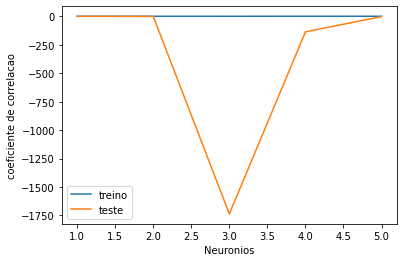

In [28]:
plt.plot(vetor_neuron,vetor_r2_treino,vetor_neuron,vetor_r2_teste)
plt.legend(['treino','teste'])
plt.xlabel('Neuronios')
plt.ylabel('coeficiente de correlacao')

In [29]:
vetor_r2_treino

[0.28408823174453224,
 0.3829545184301839,
 0.5323776177669818,
 0.6833665600796968,
 0.6904568114740122]

In [30]:
vetor_r2_teste

[0.17717765022779774,
 -0.46629933167057724,
 -1736.4964367375367,
 -136.78984151558052,
 -2.6335101691403837]